In [20]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import spearmanr, pearsonr, shapiro, chi2_contingency, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
PATH_OUT = 'data_2.csv' 
df = pd.read_csv(PATH_OUT, sep=';',encoding='utf-8', skipinitialspace=True)
df.sample(3)


,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
186,2010,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,55.0,Мужской,...,0.11,165.1,65.0,0,0,0,0,0,22.0,0
291,2012,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,55.0,Мужской,...,0.17,160.0,65.0,0,1,0,0,0,30.9,0
165,2010,Лето,Cубтропический океанический,Сидней,Австралия,Смешанный,Кондиционирование,Механическое отопление,35.0,Мужской,...,0.07,165.1,65.0,0,0,-1,-1,0,22.0,0


## Фун-я подсчета корреляций

In [22]:
def matrix_correlation(df):
    res = []
    for key in df.columns:
        for el in df.columns:
            factor1 = df[key].astype('category').cat.codes if df[key].dtype == 'object' else df[key] #кодирую номинальные данные для проведения анализа взаимосвязи
            factor2 = df[el].astype('category').cat.codes if df[el].dtype == 'object' else df[el]
            if shapiro(factor1)[1] >= 0.05 and shapiro(factor2)[1] >= 0.05:
                correlation = factor1.corr(factor2, method='pearson')
                # if correlation > 0.5:
                res.append([key, el, float(correlation)])
            else:
                correlation = factor1.corr(factor2, method='spearman')
                # if correlation > 0.5:
                res.append([key, el, float(correlation)])
    return res 

correlation = matrix_correlation(df)
correlation_table = pd.pivot_table(pd.DataFrame(correlation), values=2, index=0, columns=1, sort=False)


filtered_correlation_table = correlation_table[abs(correlation_table) >= 0.4]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


## Визуализация матрицы корреляций

![Alt text](unnamed.jpg)

### Анализ корреляции между параметрами

* Сильная корреляция климата и утепления. Можно объяснить климатическими особенностями разных регионов, где-то холоднее, где-то теплее -> приходится утепляться. Заметную корреляцию между климатом и способом обогрева можно объяснить таким же образом
* Корреляция между климатом и температурой в помещении можно объяснить особенностями региона, где-то в целом холоднее(что на улице, что в помещении)
* Умеренная корреляция время_года и утепление
* Заметную корреляцию между скоростью воздуха и среднемесячной температурой можно объяснить так: чем больше температура на улице, тем сильнее включают вентиляцию -> скорость воздуха в помещении увеличивается 
* Заметную корреляцию между кол-вом рекламаций и оценкой комфорта можно объяснить следующим образом: чем ниже оценка комфорта, тем больше рекламаций, сотрудникам не нравится находиться в некомфортном помещении -> они об этом сообщат, чтобы были приняты определенные меры


* Способ обогрева заметно коррелирует со способом охлаждения, может ли быть такое, что обычно с определенным типом охлаждения устанавливают определенный тип обогрева

<Axes: xlabel='1', ylabel='0'>

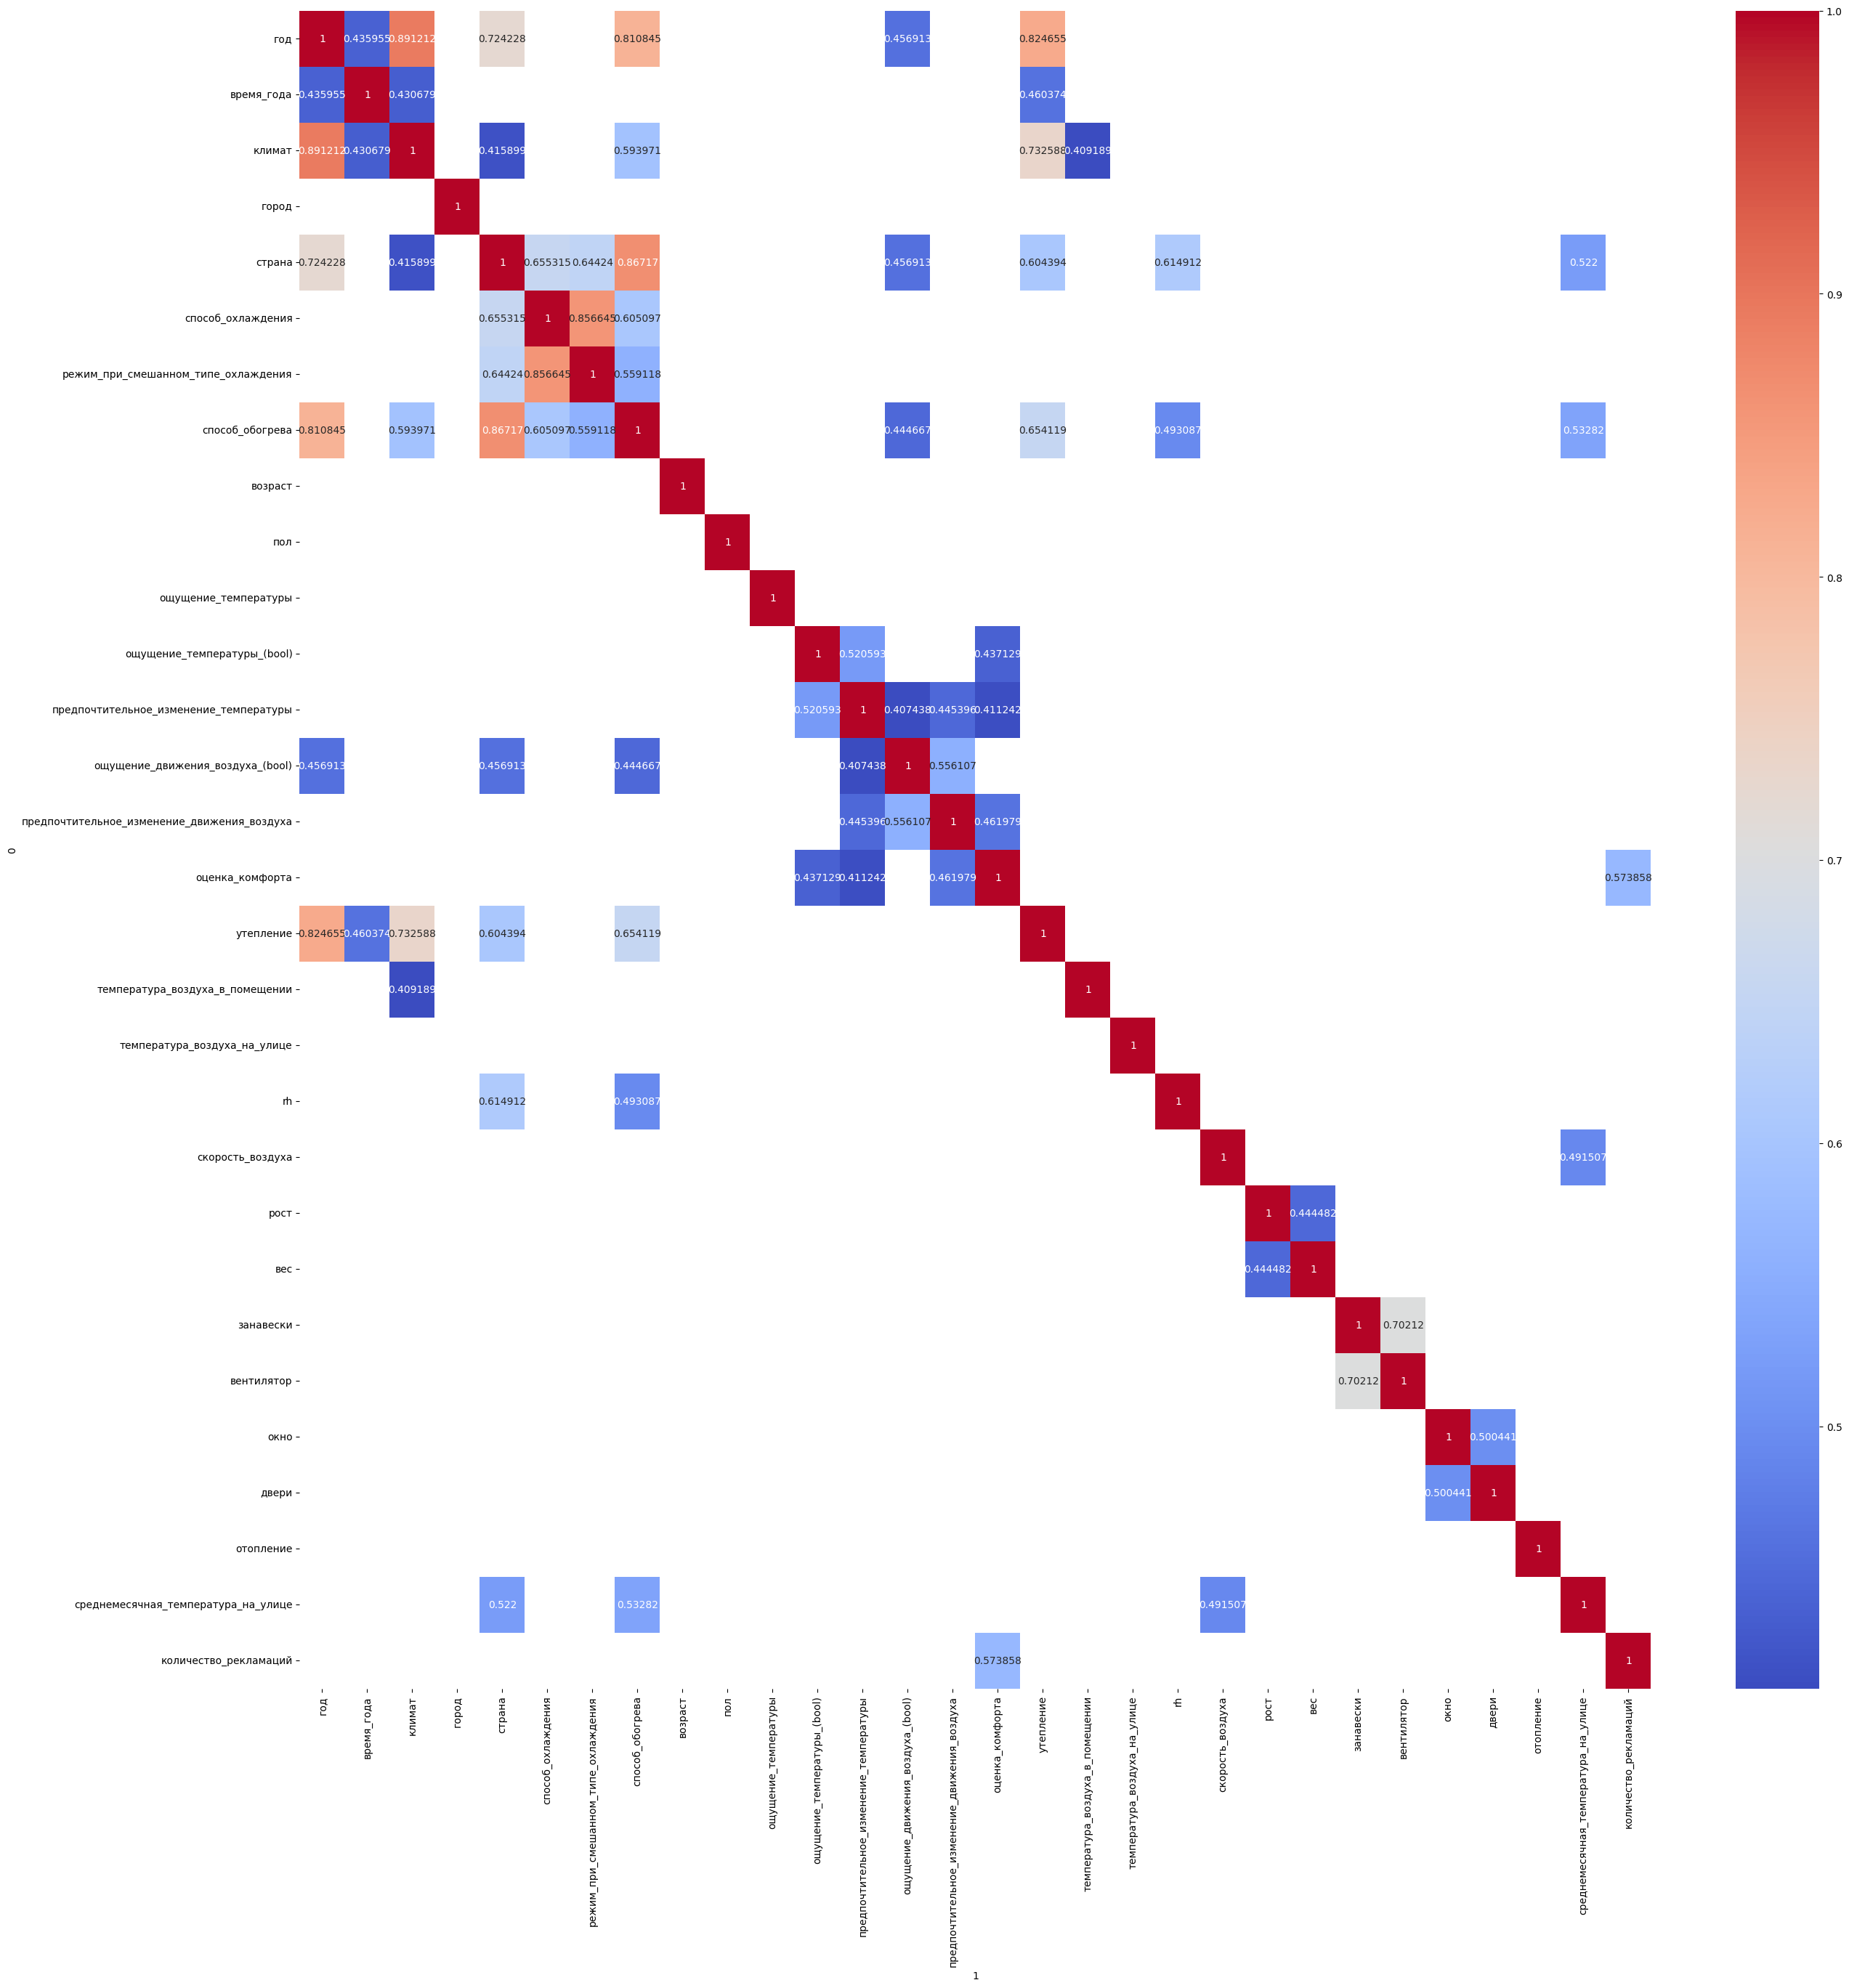

In [23]:
plt.figure(figsize=(30, 30))
sns.heatmap(filtered_correlation_table.abs(), annot=True, cmap='coolwarm', fmt='g')

In [24]:
#plt.figure(figsize=(20, 20))
#test = df.select_dtypes(include=('int', 'float')).corr().abs()
#sns.heatmap(test[test >= 0.3], annot=True, cmap='coolwarm', fmt='g')